# Project: Investigate a Dataset (Analyzing World GapMinder Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will be analyzing time series data from countries all over the world. Selected variables are:

- GDP/capital (US$ inflaction-adjusted). GDP per capita is gross domestic product divided by midyear population. Data are in constant 2010 U.S. dollars

- Democracy score (use as color).  Overall polity score rom the Polity IV dataset, calculated by subtracting an autocracy score from a democracy score. It is a summary measure of a country´s democractic and free nature. -10 is the lowest value, 10 the highest.

- Freedom index (FH).  Freedom index is the average of political rights and civil liberties ratins and is used to determinate countries´freedom statuses. It´s range on a escale of 1 (most free) to 7 (least free).

- Gini coefficient. Gini shows income inequality in a society. A higher number means more inequality.

- Happiness score (WHR). This is the national average response to the question of life evaluations asking the following "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible file for you. On which step of the ladder would you say you personally feel you stand at this time? This measure is also reffered to as Cantril life ladder. Gapminder has converted this indicator´s scale from 0 to 100 to easily communicate it in terms of percentage.

- Oil consumption, per person. Oil Consumption per capita (tonnes per year per person)

Some of the question I want to answer by using this data are:


**How did the countries´s income classification envolve over the past 60 years (World Banck classification)?**

**Are there more low income countries nowadays or the other way around?**

**Is there any relation between civil liberties and political rights and the wealth of the countries?**

**Are developed countries happier?**




In [47]:
# Import statements for all of the packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", None, "display.max_columns", None)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Democracy Score (use as color) -- Overall polity score from the Polity IV dataset, calculated by  subtracting an autocracy score from a demogracy score and free nature. -10 is the lowest value, 10 the highest
DemocracyScore = pd.read_csv(r'.\data\democracy_score_use_as_color.csv')


In [5]:
# % of year with no data by country 
percent_missing = DemocracyScore.isnull().sum() * 100 / len(DemocracyScore)
missing_value_DemocracyScore = pd.DataFrame({'column_name': DemocracyScore.columns,
                                 'percent_missing': percent_missing})

missing_value_DemocracyScore.head(10)                       
                        


,column_name,percent_missing
country,country,0.000000
1800,1800,89.090909
1801,1801,89.090909
1802,1802,89.090909
1803,1803,89.090909
1804,1804,89.090909
1805,1805,89.090909
1806,1806,89.090909
1807,1807,89.090909
1808,1808,89.090909


In [6]:
#165 distinct countries and 53 distinct years
DemocracyScore.shape

(165, 213)

In [7]:
DemocracyScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 213 entries, country to 2011
dtypes: float64(212), object(1)
memory usage: 274.7+ KB


In [8]:
#Statistics 
DemocracyScore.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,-7.555556,-7.555556,-7.555556,-7.555556,-7.555556,-7.555556,-7.555556,-7.555556,-7.555556,-7.222222,...,3.217391,3.180124,3.304348,3.565217,3.627329,3.621118,3.720497,3.720497,3.819876,3.975155
std,3.729410,3.729410,3.729410,3.729410,3.729410,3.729410,3.729410,3.729410,3.729410,4.672266,...,6.552381,6.529633,6.586960,6.467981,6.481531,6.425481,6.387694,6.318832,6.245887,6.171457
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-2.000000,-3.000000,-3.000000,-2.000000,-3.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000
50%,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.500000,...,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,7.000000,6.000000,6.000000,7.000000
75%,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
# Freedom index 
FreedomIndex = pd.read_csv(r'.\data\freedix_fh.csv')


In [10]:
# % of year with no data by country 
percent_missing = FreedomIndex.isnull().sum() * 100 / len(FreedomIndex)
missing_value_FreedomIndex = pd.DataFrame({'column_name': FreedomIndex.columns,
                                 'percent_missing': percent_missing})

missing_value_FreedomIndex.head(10)                                  

,column_name,percent_missing
country,country,0.000000
1972,1972,26.424870
1973,1973,25.906736
1974,1974,24.870466
1975,1975,21.761658
1976,1976,21.243523
1977,1977,23.316062
1978,1978,21.761658
1979,1979,20.207254
1980,1980,19.689119


In [11]:
#193 distinct countries and 48 distinct years
FreedomIndex.shape


(193, 48)

In [12]:
FreedomIndex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   1972     142 non-null    float64
 2   1973     143 non-null    float64
 3   1974     145 non-null    float64
 4   1975     151 non-null    float64
 5   1976     152 non-null    float64
 6   1977     148 non-null    float64
 7   1978     151 non-null    float64
 8   1979     154 non-null    float64
 9   1980     155 non-null    float64
 10  1981     157 non-null    float64
 11  1982     0 non-null      float64
 12  1983     158 non-null    float64
 13  1984     159 non-null    float64
 14  1985     159 non-null    float64
 15  1986     159 non-null    float64
 16  1987     159 non-null    float64
 17  1988     159 non-null    float64
 18  1989     160 non-null    float64
 19  1990     160 non-null    float64
 20  1991     179 non-null    float64
 21  1992     183 non

In [13]:
#Statistics 
FreedomIndex.describe()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,142.000000,143.000000,145.000000,151.000000,152.000000,148.000000,151.000000,154.000000,155.000000,157.000000,...,192.000000,192.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,4.299296,4.318182,4.320690,4.396026,4.413158,4.380405,4.317881,4.227273,4.261290,4.251592,...,3.309896,3.307292,3.310881,3.316062,3.297927,3.331606,3.349741,3.383420,3.391192,3.422280
std,2.008016,2.014512,1.985779,1.973757,2.005941,1.999784,2.005396,2.012291,2.009988,2.041731,...,1.971407,1.977451,1.972925,1.979347,1.978556,2.013337,2.020910,2.033735,2.035767,2.031438
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.250000,2.000000,2.500000,2.000000,...,1.500000,1.375000,1.500000,1.500000,1.000000,1.500000,1.500000,1.500000,1.500000,1.500000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.750000,5.000000,5.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.500000,5.500000,5.500000,5.500000,5.500000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [14]:
# GDP per capita.

GDP = pd.read_csv(r'.\data\gdppercapita_us_inflation_adjusted.csv')


In [15]:
# % of year with no data by country 

percent_missing = GDP.isnull().sum() * 100 / len(GDP)
missing_value_GDP = pd.DataFrame({'column_name': GDP.columns,
                                 'percent_missing': percent_missing})

missing_value_GDP.head(10)


,column_name,percent_missing
country,country,0.000000
1960,1960,54.450262
1961,1961,53.403141
1962,1962,53.403141
1963,1963,53.403141
1964,1964,53.403141
1965,1965,51.308901
1966,1966,49.738220
1967,1967,49.214660
1968,1968,48.167539


In [16]:

#191 distinct countries and 63 distinct years
GDP.shape


(191, 61)

In [17]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  191 non-null    object 
 1   1960     87 non-null     float64
 2   1961     89 non-null     float64
 3   1962     89 non-null     float64
 4   1963     89 non-null     float64
 5   1964     89 non-null     float64
 6   1965     93 non-null     float64
 7   1966     96 non-null     float64
 8   1967     97 non-null     float64
 9   1968     99 non-null     float64
 10  1969     99 non-null     float64
 11  1970     112 non-null    float64
 12  1971     112 non-null    float64
 13  1972     112 non-null    float64
 14  1973     112 non-null    float64
 15  1974     114 non-null    float64
 16  1975     117 non-null    float64
 17  1976     118 non-null    float64
 18  1977     123 non-null    float64
 19  1978     123 non-null    float64
 20  1979     124 non-null    float64
 21  1980     134 non

In [18]:
 #Statistics 
GDP.describe()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,87.000000,89.000000,89.000000,89.000000,89.000000,93.000000,96.000000,97.000000,99.000000,99.000000,...,191.00000,189.000000,188.000000,188.000000,188.000000,187.000000,186.000000,186.000000,185.000000,174.000000
mean,4492.482759,4572.797753,4705.584270,4866.157303,5112.134831,5145.709677,5175.385417,5296.536082,5604.949495,5903.868687,...,13951.39267,13527.455026,13639.542553,13791.478723,14021.670213,14298.427807,14580.365591,14752.446237,15092.902703,14535.988506
std,6106.174540,6295.249901,6473.619744,6690.324887,7083.451387,7185.031187,7269.699590,7498.903537,7793.085833,8247.204228,...,22427.86309,20895.793669,20782.480139,21314.465307,21927.199939,22586.751760,22986.672949,22845.068462,23568.821254,19832.408355
min,153.000000,141.000000,132.000000,142.000000,157.000000,170.000000,158.000000,145.000000,159.000000,160.000000,...,234.00000,236.000000,239.000000,243.000000,245.000000,228.000000,220.000000,214.000000,211.000000,208.000000
25%,821.000000,816.000000,814.000000,787.000000,798.000000,839.000000,785.250000,790.000000,827.500000,823.000000,...,1445.00000,1510.000000,1582.500000,1620.000000,1640.000000,1720.000000,1795.000000,1862.500000,1810.000000,1767.500000
50%,1500.000000,1510.000000,1520.000000,1480.000000,1580.000000,1720.000000,1710.000000,1720.000000,1790.000000,1840.000000,...,4660.00000,4920.000000,5385.000000,5635.000000,5795.000000,5740.000000,5865.000000,5890.000000,5940.000000,5870.000000
75%,4560.000000,4710.000000,4990.000000,5260.000000,5400.000000,5400.000000,5245.000000,5230.000000,5845.000000,6285.000000,...,14350.00000,14200.000000,14825.000000,14900.000000,15050.000000,15050.000000,15550.000000,15750.000000,16200.000000,17075.000000
max,27100.000000,27900.000000,27900.000000,28600.000000,30500.000000,29900.000000,30000.000000,30300.000000,31200.000000,34100.000000,...,151000.00000,159000.000000,159000.000000,172000.000000,183000.000000,190000.000000,194000.000000,186000.000000,196000.000000,111000.000000


In [19]:
# GINI Coefficient.  

Gini = pd.read_csv(r'.\data\gini.csv')


In [20]:
# % of year with no data by country 

percent_missing = Gini.isnull().sum() * 100 / len(Gini)
missing_value_Gini = pd.DataFrame({'column_name': Gini.columns,
                                 'percent_missing': percent_missing})

missing_value_Gini.head()


,column_name,percent_missing
country,country,0.0
1800,1800,0.0
1801,1801,0.0
1802,1802,0.0
1803,1803,0.0


In [21]:
#195 distinct countries and 61 distinct years
Gini.shape


(195, 242)

In [22]:
Gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2040
dtypes: float64(241), object(1)
memory usage: 368.8+ KB


In [23]:
#Statistics 
Gini.describe()


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,...,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769
std,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,...,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433
min,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000
50%,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000
75%,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,...,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000
max,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000


In [24]:
# Happiness score (WHR)

WHR = pd.read_csv(r'.\data\hapiscore_whr.csv')


In [25]:
# % of year with no data by country 

percent_missing = WHR.isnull().sum() * 100 / len(WHR)
missing_value_WHR = pd.DataFrame({'column_name': WHR.columns,
                                 'percent_missing': percent_missing})

missing_value_WHR.head(10)

,column_name,percent_missing
country,country,0.000000
2005,2005,83.229814
2006,2006,45.962733
2007,2007,37.267081
2008,2008,33.540373
2009,2009,30.434783
2010,2010,24.844720
2011,2011,11.180124
2012,2012,14.285714
2013,2013,16.770186


In [26]:

#161 distinct countries and 16 distinct years
WHR.shape


(161, 16)

In [27]:
WHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  161 non-null    object 
 1   2005     27 non-null     float64
 2   2006     87 non-null     float64
 3   2007     101 non-null    float64
 4   2008     107 non-null    float64
 5   2009     112 non-null    float64
 6   2010     121 non-null    float64
 7   2011     143 non-null    float64
 8   2012     138 non-null    float64
 9   2013     134 non-null    float64
 10  2014     141 non-null    float64
 11  2015     140 non-null    float64
 12  2016     138 non-null    float64
 13  2017     144 non-null    float64
 14  2018     133 non-null    float64
 15  2019     149 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.2+ KB


In [28]:
WHR.describe()


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,27.000000,87.000000,101.000000,107.000000,112.000000,121.000000,143.000000,138.000000,134.000000,141.00000,140.000000,138.000000,144.000000,133.000000,149.000000
mean,0.644593,0.518138,0.542119,0.541897,0.545438,0.549256,0.542189,0.543659,0.538104,0.53817,0.539543,0.538486,0.545007,0.548729,0.546013
std,0.091888,0.110137,0.105214,0.118547,0.103771,0.113714,0.109184,0.113156,0.118906,0.11683,0.112399,0.115215,0.114883,0.111007,0.112181
min,0.472000,0.320000,0.328000,0.281000,0.341000,0.323000,0.294000,0.316000,0.269000,0.28400,0.270000,0.269000,0.266000,0.269000,0.257000
25%,0.554000,0.444000,0.467000,0.459000,0.465500,0.461000,0.469000,0.457750,0.450250,0.44800,0.461000,0.451250,0.461250,0.466000,0.468000
50%,0.662000,0.508000,0.522000,0.517000,0.532500,0.546000,0.522000,0.521500,0.524000,0.53100,0.533000,0.537000,0.551500,0.543000,0.550000
75%,0.716000,0.592500,0.614000,0.633500,0.627250,0.635000,0.635500,0.625750,0.630500,0.62800,0.626000,0.613500,0.624000,0.628000,0.623000
max,0.802000,0.767000,0.783000,0.797000,0.768000,0.777000,0.779000,0.778000,0.759000,0.75100,0.760000,0.766000,0.779000,0.786000,0.781000


In [29]:
# Oil Consumption, per person (tonnes per year per person)

OilCons = pd.read_csv(r'.\data\oil_consumption_per_cap.csv')


In [30]:
# % of year with no data by country 

percent_missing = OilCons.isnull().sum() * 100 / len(OilCons)
missing_value_OilCons= pd.DataFrame({'column_name': OilCons.columns,
                                 'percent_missing': percent_missing})

missing_value_OilCons.head() 

,column_name,percent_missing
country,country,0.000000
1965,1965,18.181818
1966,1966,18.181818
1967,1967,18.181818
1968,1968,18.181818


In [31]:
#77 distinct countries and 56 distinct years
OilCons.shape

(77, 56)

In [32]:
OilCons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 56 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  77 non-null     object 
 1   1965     63 non-null     float64
 2   1966     63 non-null     float64
 3   1967     63 non-null     float64
 4   1968     63 non-null     float64
 5   1969     63 non-null     float64
 6   1970     63 non-null     float64
 7   1971     64 non-null     float64
 8   1972     64 non-null     float64
 9   1973     64 non-null     float64
 10  1974     64 non-null     float64
 11  1975     64 non-null     float64
 12  1976     64 non-null     float64
 13  1977     64 non-null     float64
 14  1978     64 non-null     float64
 15  1979     64 non-null     float64
 16  1980     64 non-null     float64
 17  1981     64 non-null     float64
 18  1982     64 non-null     float64
 19  1983     64 non-null     float64
 20  1984     64 non-null     float64
 21  1985     74 non-nu

In [33]:
#Statistics 
OilCons.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,64.000000,64.00000,64.000000,64.00000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.037568,1.077371,1.109970,1.171632,1.221911,1.290119,1.300288,1.39890,1.448625,1.36962,...,1.460865,1.447675,1.434584,1.422903,1.391901,1.411451,1.433869,1.428500,1.432618,1.414805
std,1.604361,1.491773,1.391837,1.351749,1.321664,1.322417,1.276033,1.36897,1.356488,1.23589,...,1.731727,1.712283,1.685562,1.678215,1.645077,1.700971,1.739554,1.722017,1.727742,1.670173
min,0.015100,0.019000,0.018200,0.019400,0.025300,0.034100,0.010300,0.01250,0.014000,0.01430,...,0.026600,0.034000,0.036000,0.034900,0.038800,0.040600,0.044100,0.048800,0.055200,0.052300
25%,0.191500,0.208500,0.190500,0.229500,0.231500,0.261000,0.274500,0.29425,0.330750,0.33325,...,0.499000,0.494000,0.499000,0.497000,0.485000,0.558000,0.544000,0.546000,0.520000,0.549000
50%,0.524000,0.570000,0.637000,0.696000,0.742000,0.828000,0.876000,0.94900,1.005500,1.03000,...,1.030000,1.020000,1.080000,1.040000,1.050000,0.983000,1.010000,0.985000,0.992000,1.030000
75%,1.355000,1.490000,1.570000,1.675000,1.765000,1.905000,2.022500,2.15500,2.210000,2.08750,...,1.650000,1.580000,1.590000,1.590000,1.480000,1.480000,1.530000,1.500000,1.470000,1.520000
max,11.500000,10.200000,9.010000,8.040000,7.220000,6.540000,6.030000,6.14000,5.500000,4.75000,...,11.900000,12.100000,11.800000,11.700000,11.800000,12.300000,12.700000,12.900000,12.900000,12.400000


### Data Cleaning

In [34]:
#Drop all columns with more than 30% of countries will null values.
cols = DemocracyScore.columns[DemocracyScore.isnull().mean()>0.3]

DemocracyScore.drop(cols, axis= 1, inplace=True)

In [35]:
#Drop columns to adpat the dataset to analysis period
cols = Gini.loc[:,'1800': '1959']

Gini.drop(cols, axis= 1, inplace=True)


cols2 = Gini.loc[:,'2020': '2040']
Gini.drop(cols2, axis= 1, inplace=True)

In [36]:
#Unpivot DataFrames from wide to long format

DemocracyScorePivot = DemocracyScore.melt(id_vars=['country'], var_name='year', value_name='demoIndex')
DemocracyScorePivot.sort_values(['country','year'], inplace=True)
DemocracyScorePivot.head(3)

,country,year,demoIndex
0,Afghanistan,1960,-10.0
165,Afghanistan,1961,-10.0
330,Afghanistan,1962,-10.0


In [37]:
FreedomIndexPivot = FreedomIndex.melt(id_vars=['country'], var_name='year', value_name='FreedomIndex')
FreedomIndexPivot.sort_values(['country','year'], inplace=True)
FreedomIndexPivot.head(3)

,country,year,FreedomIndex
0,Afghanistan,1972,4.5
193,Afghanistan,1973,6.5
386,Afghanistan,1974,6.5


In [38]:
GiniPivot = Gini.melt(id_vars=['country'], var_name='year', value_name='Gini')
GiniPivot.sort_values(['country','year'], inplace=True)
GiniPivot.head(3)

,country,year,Gini
0,Afghanistan,1960,34.4
195,Afghanistan,1961,34.1
390,Afghanistan,1962,33.7


In [39]:
WHRPivot = WHR.melt(id_vars=['country'], var_name='year', value_name='WHR')
WHRPivot.sort_values(['country','year'], inplace=True)
WHRPivot.head(3)

,country,year,WHR
0,Afghanistan,2005,NaN
161,Afghanistan,2006,NaN
322,Afghanistan,2007,NaN


In [40]:
GPDPivot = GDP.melt(id_vars=['country'], var_name='year', value_name='GDP')
GPDPivot.sort_values(['country','year'], inplace=True)
GPDPivot.head(3)

,country,year,GDP
0,Afghanistan,1960,NaN
191,Afghanistan,1961,NaN
382,Afghanistan,1962,NaN


In [41]:
OilConsPivot = OilCons.melt(id_vars=['country'], var_name='year', value_name='OilCons')
OilConsPivot.sort_values(['country','year'], inplace=True)
OilConsPivot.head(3)

,country,year,OilCons
0,Algeria,1965,0.103
77,Algeria,1966,0.131
154,Algeria,1967,0.119


In [42]:
#Merging all datasets

from functools import reduce
data_frames = [DemocracyScorePivot , FreedomIndexPivot,GPDPivot, GiniPivot, WHRPivot , OilConsPivot ]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['country', 'year'],
                                            how='outer'), data_frames)

df_merged.head(10)

,country,year,demoIndex,FreedomIndex,GDP,Gini,WHR,OilCons
0,Afghanistan,1960,-10.0,NaN,NaN,34.4,NaN,NaN
1,Afghanistan,1961,-10.0,NaN,NaN,34.1,NaN,NaN
2,Afghanistan,1962,-10.0,NaN,NaN,33.7,NaN,NaN
3,Afghanistan,1963,-10.0,NaN,NaN,33.2,NaN,NaN
4,Afghanistan,1964,-7.0,NaN,NaN,32.7,NaN,NaN
5,Afghanistan,1965,-7.0,NaN,NaN,32.2,NaN,NaN
6,Afghanistan,1966,-7.0,NaN,NaN,31.7,NaN,NaN
7,Afghanistan,1967,-7.0,NaN,NaN,31.2,NaN,NaN
8,Afghanistan,1968,-7.0,NaN,NaN,30.8,NaN,NaN
9,Afghanistan,1969,-7.0,NaN,NaN,30.5,NaN,NaN


In [ ]:

df_merged.to_csv(r'.\data\world_gapminderData_v1.csv', index=False)


In [43]:
df_merged.describe()

,demoIndex,FreedomIndex,GDP,Gini,WHR,OilCons
count,8021.000000,8100.000000,8999.000000,11700.000000,1815.000000,3954.000000
mean,-0.017766,3.696778,10964.277031,39.674632,0.543239,1.405923
std,7.412740,2.049987,18092.558406,9.358133,0.112971,1.487063
min,-10.000000,1.000000,132.000000,16.000000,0.257000,0.010300
25%,-7.000000,1.500000,1200.000000,33.300000,0.460500,0.439250
50%,-2.000000,3.500000,3450.000000,40.000000,0.532000,1.015000
75%,8.000000,5.500000,12400.000000,44.300000,0.627000,1.880000
max,10.000000,7.000000,196000.000000,77.000000,0.802000,12.900000


In [44]:
world_gapminderData_v1 = pd.read_csv(r'.\data\world_gapminderData_v1.csv')


In [45]:
world_gapminderData_v1.describe()

,year,demoIndex,FreedomIndex,GDP,Gini,WHR,OilCons
count,11700.000000,8021.000000,8100.000000,8999.000000,11700.000000,1815.000000,3954.000000
mean,1989.500000,-0.017766,3.696778,10964.277031,39.674632,0.543239,1.405923
std,17.318842,7.412740,2.049987,18092.558406,9.358133,0.112971,1.487063
min,1960.000000,-10.000000,1.000000,132.000000,16.000000,0.257000,0.010300
25%,1974.750000,-7.000000,1.500000,1200.000000,33.300000,0.460500,0.439250
50%,1989.500000,-2.000000,3.500000,3450.000000,40.000000,0.532000,1.015000
75%,2004.250000,8.000000,5.500000,12400.000000,44.300000,0.627000,1.880000
max,2019.000000,10.000000,7.000000,196000.000000,77.000000,0.802000,12.900000


In [46]:
#We will classify countries by income.The World Bank assigns the world’s economies to four income groups—low, lower-middle, upper-middle, and high-income countries.

bin_edges = [0, 1036, 4045, 12535, 300000 ]
bin_names = ['Low_income' , 'Lower-middle_income','Upper-middle_income' ,'High_income' ]
world_gapminderData_v1['WorldBankClassificationByIncome'] = pd.cut(world_gapminderData_v1['GDP'], bin_edges, labels=bin_names)
world_gapminderData_v1.head(10)

,country,year,demoIndex,FreedomIndex,GDP,Gini,WHR,OilCons,WorldBankClassificationByIncome
0,Afghanistan,1960,-10.0,NaN,NaN,34.4,NaN,NaN,NaN
1,Afghanistan,1961,-10.0,NaN,NaN,34.1,NaN,NaN,NaN
2,Afghanistan,1962,-10.0,NaN,NaN,33.7,NaN,NaN,NaN
3,Afghanistan,1963,-10.0,NaN,NaN,33.2,NaN,NaN,NaN
4,Afghanistan,1964,-7.0,NaN,NaN,32.7,NaN,NaN,NaN
5,Afghanistan,1965,-7.0,NaN,NaN,32.2,NaN,NaN,NaN
6,Afghanistan,1966,-7.0,NaN,NaN,31.7,NaN,NaN,NaN
7,Afghanistan,1967,-7.0,NaN,NaN,31.2,NaN,NaN,NaN
8,Afghanistan,1968,-7.0,NaN,NaN,30.8,NaN,NaN,NaN
9,Afghanistan,1969,-7.0,NaN,NaN,30.5,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1. 

The World Bank assigns the world’s economies to four income groups—low, lower-middle, upper-middle, and high-income countries. 

How each variable performs in each of the group?

**Which was the evolution of Democracy Score, Freedom Index, GDP per capita, Income inquality index and Happines Score across the year?**



Text(0, 0.5, 'Gini Mean Index')

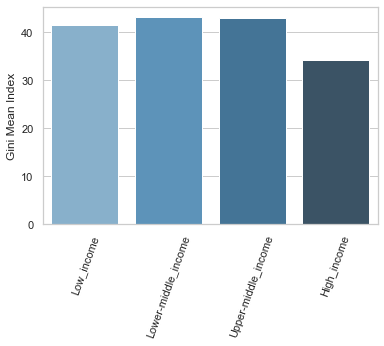

In [103]:
sns.set_theme(style ="whitegrid")
ginimean = world_gapminderData_v1.groupby([ 'WorldBankClassificationByIncome'])['Gini'].mean().to_frame(name = 'GiniIndex').reset_index()
ax = sns.barplot(x="WorldBankClassificationByIncome", y="GiniIndex", data = ginimean,   palette="Blues_d")

plt.setp(ax.get_xticklabels(), rotation=70)
plt.xlabel('')
plt.ylabel('Gini Mean Index')

In [188]:
world_gapminderData_v1.columns

Index(['country', 'year', 'demoIndex', 'FreedomIndex', 'GDP', 'Gini', 'WHR',
       'OilCons', 'WorldBankClassificationByIncome'],
      dtype='object')

In [50]:
ginimeanyear = world_gapminderData_v1.groupby([ 'year'])['Gini'].mean().to_frame(name = 'GiniIndex')

<AxesSubplot:xlabel='year'>

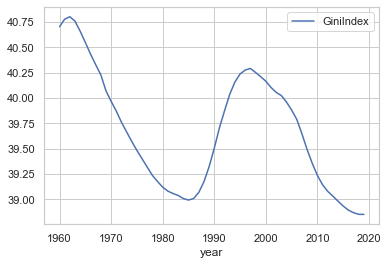

In [51]:
ginimeanyear.plot.line()

Text(0.5, -82.52446605573303, '')

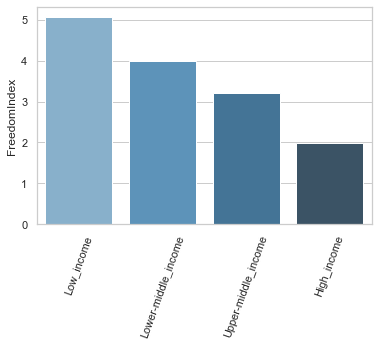

In [52]:
sns.set_theme(style ="whitegrid")
Freedommean = world_gapminderData_v1.groupby([ 'WorldBankClassificationByIncome'])['FreedomIndex'].mean().to_frame(name = 'FreedomIndex').reset_index()
ax = sns.barplot(x="WorldBankClassificationByIncome", y="FreedomIndex", data = Freedommean,   palette="Blues_d")
plt.setp(ax.get_xticklabels(), rotation=70)
plt.savefig('mvel_6turntypes.png', dpi=400, bbox_inches='tight')
plt.xlabel('')


In [53]:
Freedommeanyear = world_gapminderData_v1.groupby(['year'])['FreedomIndex'].mean().to_frame(name = 'FreedomIndex')

<AxesSubplot:xlabel='year'>

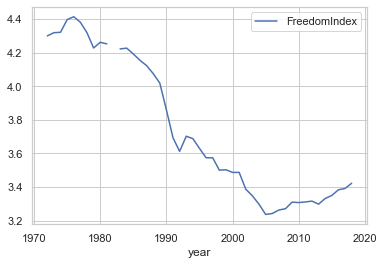

In [54]:
Freedommeanyear.plot.line()

Text(28.0, 0.5, 'Demo Mean Index')

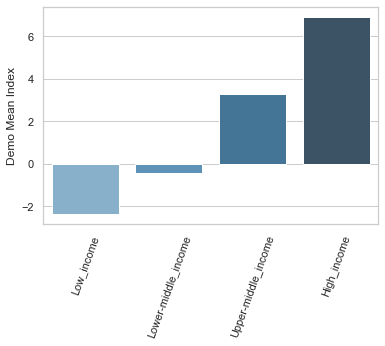

In [55]:
sns.set_theme(style ="whitegrid")
Demomean = world_gapminderData_v1.groupby([ 'WorldBankClassificationByIncome'])['demoIndex'].mean().to_frame(name = 'demoIndex').reset_index()
ax = sns.barplot(x="WorldBankClassificationByIncome", y="demoIndex", data = Demomean,   palette="Blues_d")
plt.setp(ax.get_xticklabels(), rotation=70)
plt.savefig('mvel_6turntypes.png', dpi=400, bbox_inches='tight')
plt.xlabel('')
plt.ylabel('Demo Mean Index')

In [56]:
Demommeanyear = world_gapminderData_v1.groupby(['year'])['demoIndex'].mean().to_frame(name = 'demoIndex')

<AxesSubplot:xlabel='year'>

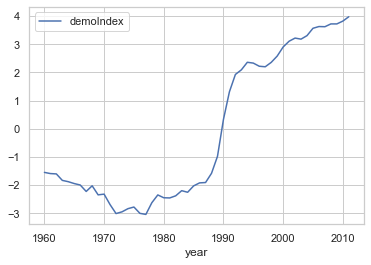

In [57]:
Demommeanyear.plot.line()

Text(25.125, 0.5, 'Oil consumption tonnes per person')

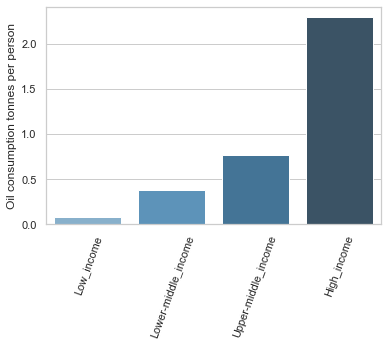

In [58]:
sns.set_theme(style ="whitegrid")
OilConsmean = world_gapminderData_v1.groupby([ 'WorldBankClassificationByIncome'])['OilCons'].mean().to_frame(name = 'OilCons').reset_index()
ax = sns.barplot(x="WorldBankClassificationByIncome", y="OilCons", data = OilConsmean,   palette="Blues_d")
plt.setp(ax.get_xticklabels(), rotation=70)
plt.savefig('mvel_6turntypes.png', dpi=400, bbox_inches='tight')
plt.xlabel('')
plt.ylabel('Oil consumption tonnes per person')

In [59]:
OilConsmeanyear = world_gapminderData_v1.groupby(['year'])['OilCons'].mean().to_frame(name = 'OilCons')

<AxesSubplot:xlabel='year'>

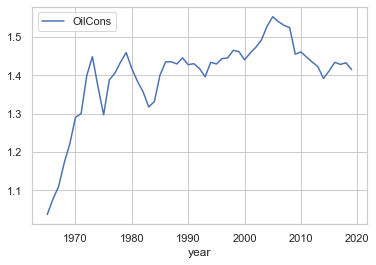

In [60]:
OilConsmeanyear.plot.line()

Text(0, 0.5, 'GDP')

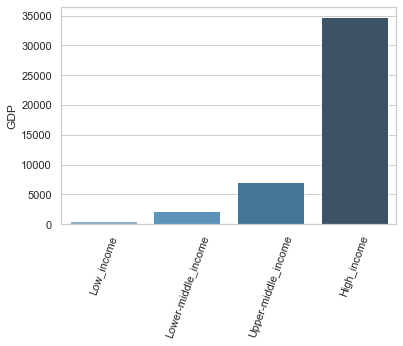

In [100]:
sns.set_theme(style ="whitegrid")
GDPmean = world_gapminderData_v1.groupby([ 'WorldBankClassificationByIncome'])['GDP'].mean().to_frame(name = 'GDP').reset_index()
ax = sns.barplot(x="WorldBankClassificationByIncome", y="GDP", data = GDPmean,   palette="Blues_d")
plt.setp(ax.get_xticklabels(), rotation=70)
plt.xlabel('')
plt.ylabel('GDP')

In [62]:
GDPmeanyear = world_gapminderData_v1.groupby(['year'])['GDP'].mean().to_frame(name = 'GDP')

<AxesSubplot:xlabel='year'>

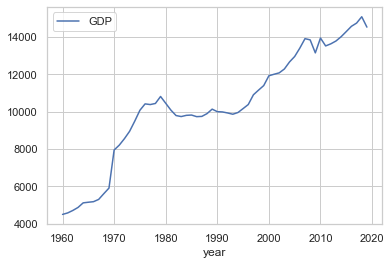

In [63]:
GDPmeanyear.plot.line()

Text(25.125, 0.5, 'WHR')

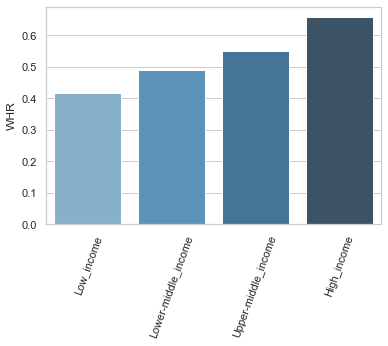

In [64]:
sns.set_theme(style ="whitegrid")
WHRmean = world_gapminderData_v1.groupby([ 'WorldBankClassificationByIncome'])['WHR'].mean().to_frame(name = 'WHR').reset_index()
ax = sns.barplot(x="WorldBankClassificationByIncome", y="WHR", data = WHRmean,   palette="Blues_d")
plt.setp(ax.get_xticklabels(), rotation=70)
plt.savefig('mvel_6turntypes.png', dpi=400, bbox_inches='tight')
plt.xlabel('')
plt.ylabel('WHR')

In [65]:
WHRmeanyear = world_gapminderData_v1.groupby(['year'])['WHR'].mean().to_frame(name = 'WHR')

<AxesSubplot:xlabel='year'>

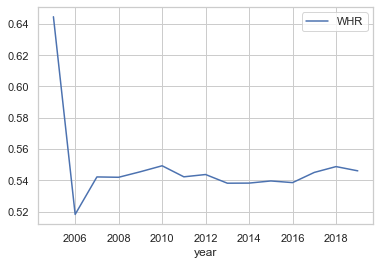

In [66]:
WHRmeanyear.plot.line()

**How was the evolution of countries belonging to each group over the years?**

In the next graph we can see the evolution in terms on how many countries belong to each group along the years.

Luckily, percentage of countries that belongs to Low Income group has drastically reduced across the years. In 1960, 34.5% countries in the study were clasified as Low Income, 37.93% Lower Middle Income, 13.79% Upper Middel Income and 13.79% High Income.

In 2019 things are totally different. High Income countries represents 31% and Low Income are 13.79%

In [67]:
# Calculating the percentage of countries belonging to each group for each year.

worlbankclas_peryear = world_gapminderData_v1.groupby(['year','WorldBankClassificationByIncome']).size()

worlbankclas_peryear_percent =  worlbankclas_peryear.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).to_frame(name = 'Percent').reset_index()
worlbankclas_peryear_percent.head()


,year,WorldBankClassificationByIncome,Percent
0,1960,Low_income,34.482759
1,1960,Lower-middle_income,37.931034
2,1960,Upper-middle_income,13.793103
3,1960,High_income,13.793103
4,1961,Low_income,34.831461


Text(0, 0.5, 'Percent')

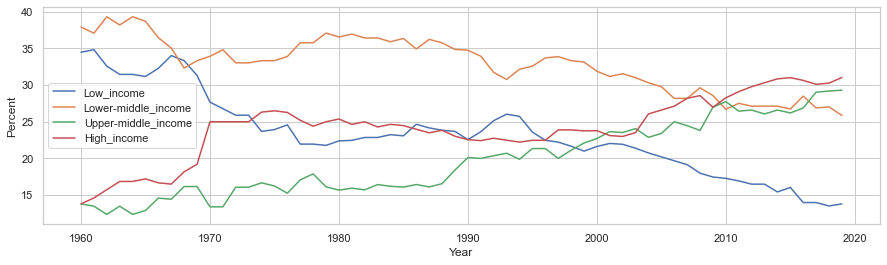

In [68]:
fig, ax = plt.subplots( figsize=(15,4), sharey=True)


# key gives the group name (i.e. category), data gives the actual values
for key, data in worlbankclas_peryear_percent.groupby('WorldBankClassificationByIncome'):
    data.plot(x='year', y='Percent', ax=ax, label=key)


plt.xlabel('Year')
plt.ylabel('Percent')


### ### Research Question 2. 
**What factors make a country rich?**  

Now that we have explore how was the evolution during the last 70 years. Let´s focus in the present and see how each variable explain the position in each group, in other words, does any of the studied variables explains whether a country is rich or no?

Analyzing the scatterplot graphs, it is clear that a relationship exists between how rich a country is and their oil consumption. The richer the more oil per person they use. 
This is the same for the happiness, people living in developed countries reports to be happier than the ones living in low income group and both variable are definitively correlated.

The other variable are not as strong correlated as the one mentioned above. 




In [92]:
world_gapminderData_2011 = world_gapminderData_v1.query('year == "2011"')

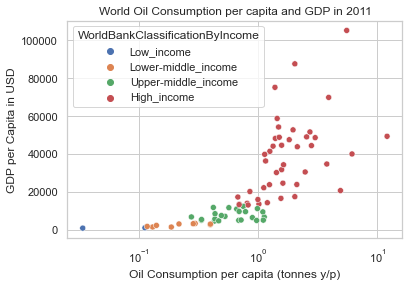

In [99]:

sns.scatterplot(x=world_gapminderData_2011['OilCons'], y=world_gapminderData_2011['GDP'], hue = world_gapminderData_2011['WorldBankClassificationByIncome'])

plt.grid(True)
plt.xscale('log')
plt.xlabel('Oil Consumption per capita (tonnes y/p)')
plt.ylabel('GDP per Capita in USD')
plt.title('World Oil Consumption per capita and GDP in 2011')
plt.show()


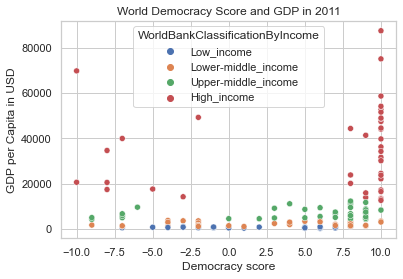

In [95]:

sns.scatterplot(x=world_gapminderData_2011['demoIndex'], y= world_gapminderData_2011['GDP'], hue = world_gapminderData_2011['WorldBankClassificationByIncome'])
plt.grid(True)
plt.xlabel('Democracy score')
plt.ylabel('GDP per Capita in USD')
plt.title('World Democracy Score and GDP in 2011')
plt.show()

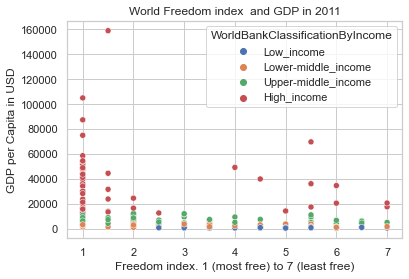

In [96]:
sns.scatterplot(x=world_gapminderData_2011['FreedomIndex'],y=world_gapminderData_2011['GDP'], hue = world_gapminderData_2011['WorldBankClassificationByIncome'])
plt.grid(True)
plt.xlabel('Freedom index. 1 (most free) to 7 (least free)')
plt.ylabel('GDP per Capita in USD')
plt.title('World Freedom index  and GDP in 2011')
plt.show()

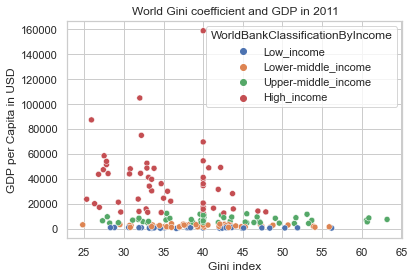

In [97]:
sns.scatterplot(x= world_gapminderData_2011['Gini'], y=world_gapminderData_2011['GDP'], hue = world_gapminderData_2011['WorldBankClassificationByIncome'])
plt.grid(True)
plt.xlabel('Gini index')
plt.ylabel('GDP per Capita in USD')
plt.title('World Gini coefficient and GDP in 2011')
plt.show()

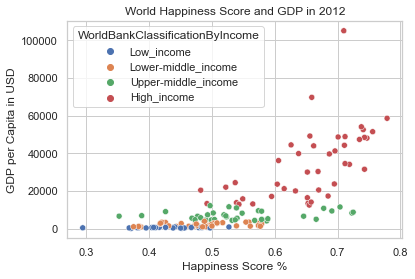

In [98]:
sns.scatterplot(x= world_gapminderData_2011['WHR'], y= world_gapminderData_2011['GDP'], hue = world_gapminderData_2011['WorldBankClassificationByIncome'])
plt.grid(True)
plt.xlabel('Happiness Score %')
plt.ylabel('GDP per Capita in USD')
plt.title('World Happiness Score and GDP in 2012')
plt.show()

<a id='conclusions'></a>
## Conclusions

According to the explaratory analysis, it seems that poor country are more inequality, suffer lower freedom and their democracies have a long way to travel to leave the autocracy. It is not suprising that this is reflected in happiness score, the poorer, the less happiness countries tent to be. 
On the other hand, wealth has a price, and this price is paid by Enviroment... Oil consumption per person is much higher on High Income country than in Low income ones.

Finally it is good to know that poor countries has fallen dramatically from 1060 to 2019. Low income countries dropped from 34.5% out of total countries in 1960 to 13.79% in the present.